# Interpolation and Quadrature

We consider the following task. Given $n+1$ distinct points $x_0,x_1,\dots,x_n$, and $n+1$ values $y_0,y_1,\dots,y_n$. Find a polynomial $p_n$ of maximum degree $n$, such that $p(x_j)=y_j$.

In this section we will answer the following questions:

   1. Does a polynomial $p_n$ with $p_n(x_j)=y_j$ always exist, and if yes, is it unique?
   2. How can we construct such a polynomial in practice?
   3. If the values $y_j$ are samples of a function. Do we convergence to the function if $n\rightarrow\infty$?


## Existence and uniqueness of polynomial interpolation

Let $p_n(x)=a_0+a_1x+a_2x^2+\dots+a_nx^n$. We define the following matrix.

$$
V = \begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n\\
1 & x_1 & x_1^2 & \dots & x_1^n\\
\vdots & \vdots & \vdots & \dots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}
$$


It is called a Vandermonde matrix. With this matrix the interpolation problem can be equivalently posed as
$$
V\begin{bmatrix}a_0\\ a_1\\ \vdots\\ a_n\end{bmatrix}
=
\begin{bmatrix}y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}.
$$
Hence, existence and uniqueness follows immediately if $V$ is nonsingular.


**Theorem**

We have $\det(V)=\prod_{0\leq i<j\leq n}(x_j-x_i)$. Hence, if $x_i\neq x_j$ for all $i\neq j$ the Vandermonde matrix is nonsingular and there exists a unique interpolation polynomial $p_n$ with $p_n(x_j)=y_j$.



**Remark**

The proof is based on elementary expansions of the determinant. However, here we will proceed differently to proof existence and uniqueness, using the Lagrange interpolation polynomial. This will at the same time also provide a constructive method to obtain $p_n$. The reason why Vandermonde matrices are rarely used in practice is given below. Their condition numbers grow exponentially for a simple problem with equally spaced points on the real line.

In [1]:
#Numerical properties of Vandermonde matrices.
import numpy as np

nvec = range(10,100,10)

for n in nvec:
    x = np.linspace(-1,1,n)
    A = np.vander(x)
    print("Condition number for n=%i: %e" % (n,np.linalg.cond(A)))


Condition number for n=10: 4.626450e+03
Condition number for n=20: 2.722408e+08
Condition number for n=30: 1.839029e+13
Condition number for n=40: 1.423528e+17
Condition number for n=50: 2.894997e+18
Condition number for n=60: 1.335904e+19
Condition number for n=70: 1.091601e+20
Condition number for n=80: 3.382641e+19
Condition number for n=90: 1.484173e+20


## Lagrange Interpolation

We consider the simpler problem that $y_k=1$ for a given $k$, and $y_j=0$ for $k\neq \ell$. We can explicitly construct a solution as

$$
L_k(x)= \prod_{j=0,j\neq k}^n \frac{(x-x_j)}{(x_k-x_j)}
$$
It follows immediately that $\text{deg}(L_k)=n$, $L_k(x_k)=1$, $L_k(x_j)=0$ for $j\neq k$. The functions $L_k$ are called Lagrange interpolation polynomials.


The solution to the original interpolation problem is now simply constructed as

$$
p_n(x)= \sum_{k=0}^ny_kL_k(x).
$$

The above form of the interpolation polynomial is called Lagrange interpolation polynomial. We still need to prove uniqueness.

**Theorem**
There exists exactly one interpolation polynomial.

**Proof**
Let $q_n(x)$ be an other polynomial of maximum degree $n$ that satisfies $q_n(x_j)=y_j$. Let $w_n:=p_n-q_n$. We then have $w(x_j)=0$, $j=0,\dots,n$. Hence, the polynomial $w_n$ is a polynomial of maximum degree $n$ with $n+1$ distinct zeros. But since a nontrivial polynomial can only have at most $n$ zeros it follows that $w\equiv 0$, showing that $p_n$ is the unique interpolation polynomial.

## Barycentric Interpolation

In practice often a different form of Lagrange interpolation is used, called Barycentric Interpolation. 

Let $\ell(x)=\prod_{j=0}^n(x-x_j)$, and define $w_k=\left[\prod_{j=0,j\neq k}^n(x_k-x_j)\right]^{-1}$. It follows that

$$
L_k(x)=\ell(x)\frac{w_k}{x-x_k},
$$
and therefore

$$
p_n(x)=\ell(x)\sum_{k=0}^n \frac{w_k}{x-x_k}y_k.
$$


This is called the first Barycentric form. It allows the evaluation of $p_n(x)$ in $\mathcal{O}(n)$ operations if the $w_k$ are pre-computed. However, we can be even simpler. Interpolating the constant function $1$ gives

$$
1=\ell(x)\sum_{k=0}^n \frac{w_k}{x-x_i}.
$$


Hence, we have 

$$
p_n(x)=\frac{\sum_{k=0}^n \frac{w_k}{x-x_k}y_k}{\sum_{k=0}^n \frac{w_k}{x-x_k}}.
$$
This is called the second Barycentric form. It avoids the evaluation of $\ell(x)$ altogether.


## The Runge phenomenon

Consider the following approximation problem. Given a continuous function $f$ in $[a,b]$. Find polynomials $p_n$ of maximum degree $n$, such that

$$
\lim_{n\rightarrow\infty}\left(\max_{a\leq x\leq b}|f(x)-p_n(x)|\right)=0.
$$

**Theorem [Weierstrass]**

Let $f$ be a continuous function in $[a,b]$. For every $\epsilon>0$ there exists a polynomial $p(x)$, such that

$$
\max_{a\leq x\leq b}|f(x)-p(x)|<\epsilon.
$$

Can we use interpolation in equidistant points to find these polynomials?

Let $x_j=a+\frac{j}{n}(b-a)$, $j=0,\dots,n$. Given a continuous function $f$. What is the behavior of

$$
e_n:=\max_{a\leq x\leq b}|f(x)-p_n(x)|
$$
as $n\rightarrow\infty$, where $p_n$ is the Lagrange interpolation polynomial at the points $x_j$ with data $y_j=f(x_j)$?

It turns out that $e_n\rightarrow 0$ needs not be the case even though we could naively assume that using more points and higher degree polynomials should lead to convergence. However, we may receive large oscillations at the edges of the interval. This is called Runge's phenomenon.

In [14]:
%matplotlib inline

#Runge's phenomenon in Python
from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

n=100 # Number of interpolation points
m=1000 # Number of points at which to evaluate the interpolation pol.
x=np.linspace(-1,1,n)
y=1/(1+25*x**2)
xeval=np.linspace(-1,1,m)
yeval=barycentric_interpolate(x,y,xeval)
yexact=1/(1+25*xeval**2)

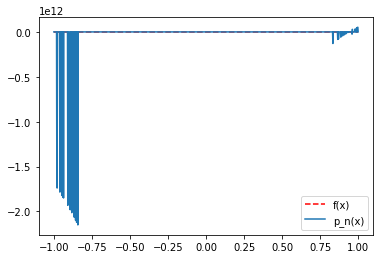

In [15]:
plt.plot(xeval,yexact,'r--',label='f(x)')
plt.plot(xeval,yeval,label='p_n(x)')
plt.legend()

Note that this phenomenon does not need to hold for all functions. In particular, periodic functions can be very well approximated by interpolation in equispaced points.

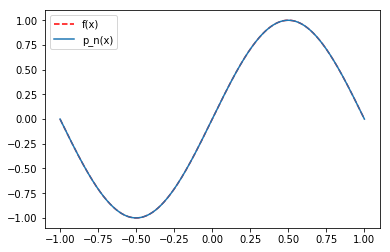

In [16]:
%matplotlib inline
#Interpolation of a periodic function.
from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

n=10# Number of interpolation points
m=1000 # Number of points at which to evaluate the interpolation pol.
x=np.linspace(-1,1,n)
y=np.sin(np.pi*x)
xeval=np.linspace(-1,1,m)
yeval=barycentric_interpolate(x,y,xeval)
yexact=np.sin(np.pi*xeval)
plt.plot(xeval,yexact,'r--',label='f(x)')
plt.plot(xeval,yeval,label='p_n(x)')
plt.legend()


One can show that in the case of the sine the rate of decay of $e_n$ is exponential, that is $e_n\leq Ce^{-\alpha n}$ for a constant $C$ and some $\alpha>0$.

Let $f$ be a given function on the interval $[-1,1]$. Let $\Pi_n$ be the space of all polynomials of degree at most $n$. The task is to represent $f$ by a polynomial in $\Pi_n$. One way is interpolation, which we have just discussed. Another possibility is Approximation. When we approximate $f$ by a polynomial in $\Pi_n$ we are looking for a polynomial $p\in\Pi_n$ such that the error $e_n:=\|p_n(x)-f(x)\|$ is minimized. Here, $\|\cdot\|$ is a suitable norm to measure the error. Above we have already seen the error in the maximum norm $e_n:=\max_{x\in[-1,1]} p_n|$. But other error norms are possible. The following code implements approximation in the energy norm

$$
\|p_n(x)-f(x)\|^2 = \int_{-1}^1|p_n(x)-f(x)|^2dx.
$$

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

nn = range(1,40)

nsample = 500
fun = lambda x: 1./(1+25*x**2)

residuals = []

for n in nn:
    
    x = np.linspace(-1,1,nsample+1)
    h = 2./nsample
    
    A =  np.vander(x,n)
    sol,res,rank,s = np.linalg.lstsq(A,fun(x))
    residuals.append(h * np.sqrt(res))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


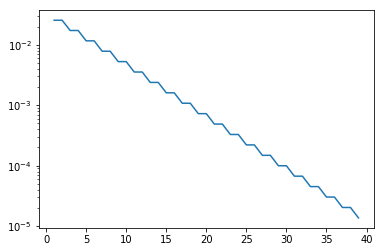

In [17]:
plt.semilogy(nn,residuals)  


## Numerical integration

One application of interpolation is the numerical integration (or quadrature) of functions. Given a complicated function $f$ in an interval $[a,b]$. Instead of evaluating

$$
I:=\int_a^bf(x)dx
$$

we evaluate

$$
I_n:=\int_a^bp_n(x)dx,
$$

where $p_n$ interpolates $f$ at a given set of points.

## Newton-Cotes formulae

We now describe the derivation of Newton-Cotes integration formulae. Define

$$
x_j=a+ih, i=0,\dots,n
$$
with $h=\frac{b-a}{n}$.

We interpolate $f$ using a Lagrange interpolation polynomial of the form

$$
p_n(x)=\sum_{k=0}^nL_k(x)f(x_k).
$$


We obtain

$$
\int_a^bf(x)dx\approx \int_a^b\sum_{k=0}^nL_k(x)f(x_k)=\sum_{k=0}^nf(x_k)\int_a^bL_k(x)dx:=\sum_{k=0}^nf(x_k)\omega_k,
$$
where the $\omega_k:=\int_a^bL_k(x)dx$ are called integration weights. They are independent of the function to integrate and can be precomputed and tabulated.

We note two simple observations for Newton-Cotes rules:

1. The sum of the weights $\omega_k$ is always $b - a$. This follows from integrating the
constant function $1$.

2. The weights are symmetric in the sense that $\omega_j = \omega_{n-j}$. This follows
from the symmetry of the $L_k$ with respect to the middle of the interval $[a,b]$.

Trapezoid Rule (n=1): $\int_a^bf(x)dx\approx \frac{b-a}{2}\left[f(a)+f(b)\right]$.

Simpson's Rule (n=2): $\int_a^bf(x)dx\approx \frac{b-a}{6}\left[f(a)+4f((a+b)/2)+f(b)\right]$


**Error estimates**

The error $E_n$ of a quadrature formula is defined as $E_n(f):=\int_a^bf(x)dx-\sum_{k=0}^n\omega_kf(x_k)$. We now have

$$
|E_n(f)|=\left|\int_a^b\left[f(x)-L_k(x)f(x_k)\right]dx\right|\leq \int_a^b|f(x)-p_n(x)|dx.
$$
The last integral can be estimated as

$$
|E_n(x)|\leq \frac{M_{n+1}}{(n+1)!}\int_a^b|(x-x_0)\dots(x-x_n)|dx,
$$
where $M_{n+1}=\max_{\xi\in[a,b]}|f^{(n+1)}(\xi)|$.


**Runge phenomenon for Newton-Cotes rules**

If we increase the order of the Newton-Cotes rule then apart from special cases we will encounter the Runge phenomenon. Hence, in order to achieve high accuracy we need to do something else. In practice one often uses so-called composite rules. The idea is that we split $[a,b]$ into $m$ subintervals $[\tau_i,\tau_{i+1}]$ with $\tau_i=a+\frac{i}{m}(b-a)$, $i=0,\dots,m-1$, and apply a low-order Newton-Cotes rule in each subinterval. 